In [ ]:
Projects steps
Analyzing Mobile App Data
Opening and Exploring the Data
Deleting Wrong Data
Removing Duplicate Entries: Part One
Removing Duplicate Entries: Part Two
Removing Non-English Apps: Part One
Removing Non-English Apps: Part Two
Isolating the Free Apps
Most Common Apps by Genre: Part One
Most Common Apps by Genre: Part Two
Most Common Apps by Genre: Part Three
Most Popular Apps by Genre on the App Store
Next Steps

In [3]:
import pandas as pd
import os

# Load a CSV file from os
file_path = r"C:\Users\oviem\OneDrive\Desktop\CSV_FiLES\AppleStore.csv"  # Path to the CSV file

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first five rows and columns
print(df.head())


          id               track_name  size_bytes currency  price  \
0  284882215                 Facebook   389879808      USD    0.0   
1  389801252                Instagram   113954816      USD    0.0   
2  529479190           Clash of Clans   116476928      USD    0.0   
3  420009108               Temple Run    65921024      USD    0.0   
4  284035177  Pandora - Music & Radio   130242560      USD    0.0   

   rating_count_tot  rating_count_ver  user_rating  user_rating_ver      ver  \
0           2974676               212          3.5              3.5       95   
1           2161558              1289          4.5              4.0    10.23   
2           2130805               579          4.5              4.5  9.24.12   
3           1724546              3842          4.5              4.0    1.6.2   
4           1126879              3594          4.0              4.5    8.4.1   

  cont_rating        prime_genre  sup_devices.num  ipadSc_urls.num  lang.num  \
0          4+  Social Ne

In [6]:
print(df.dtypes)

id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object


In [8]:
print(df['prime_genre'].unique())
print(df['currency'].unique())


['Social Networking' 'Photo & Video' 'Games' 'Music' 'Reference'
 'Health & Fitness' 'Weather' 'Utilities' 'Travel' 'Shopping' 'News'
 'Navigation' 'Lifestyle' 'Entertainment' 'Food & Drink' 'Sports' 'Book'
 'Finance' 'Education' 'Productivity' 'Business' 'Catalogs' 'Medical']
['USD']


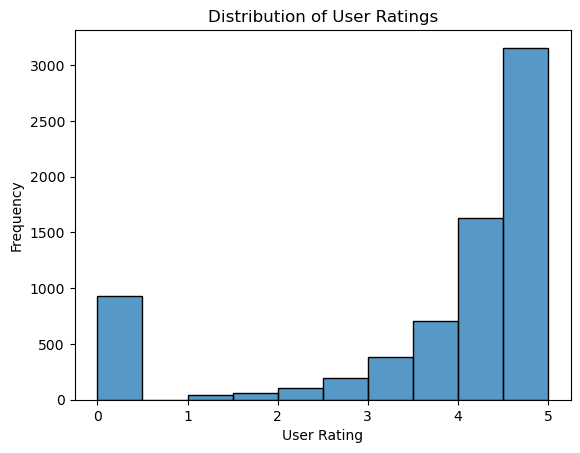

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['user_rating'], bins=10)
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings')
plt.show()


In [15]:
top_rated_apps = df[df['user_rating'] == df['user_rating'].max()]
print(top_rated_apps[['track_name', 'user_rating', 'prime_genre']])


                                      track_name  user_rating prime_genre
23                                   Head Soccer          5.0       Games
28                            Plants vs. Zombies          5.0       Games
40    Sniper 3D Assassin: Shoot to Kill Gun Game          5.0       Games
44                            Geometry Dash Lite          5.0       Games
53                                Infinity Blade          5.0       Games
...                                          ...          ...         ...
6252                    蜀山诛魔纪-古装恋爱仙侠动作手游·MMO端游品质          5.0       Games
6253                             大挂西游 - 降魔之路官方正版          5.0       Games
6261       Versus - Multiplayer Game (2 players)          5.0       Games
6266            Advent Magnificat Companion 2016          5.0        Book
6267                      おかんからのメッセ - ほのぼの謎解きゲーム          5.0        Book

[492 rows x 3 columns]


In [21]:
import pandas as pd
from langdetect import detect

# Load the CSV file into a DataFrame
file_path = r"C:\Users\oviem\OneDrive\Desktop\CSV_FiLES\AppleStore.csv"
df = pd.read_csv(file_path)

# Function to detect language
def is_english(name):
    try:
        return detect(name) == 'en'
    except:
        return False

# Filter out non-English apps using a for loop
english_apps = []
for index, row in df.iterrows():
    if is_english(row['track_name']):
        english_apps.append(row)

# Create a new DataFrame with only English apps
df_english = pd.DataFrame(english_apps)

# Display the first few rows of the cleaned DataFrame
print(df_english.head())


           id        track_name  size_bytes currency  price  rating_count_tot  \
2   529479190    Clash of Clans   116476928      USD    0.0           2130805   
7   553834731  Candy Crush Saga   222846976      USD    0.0            961794   
8   324684580     Spotify Music   132510720      USD    0.0            878563   
10  512939461    Subway Surfers   156038144      USD    0.0            706110   
13  469369175        CSR Racing   524803072      USD    0.0            677247   

    rating_count_ver  user_rating  user_rating_ver      ver cont_rating  \
2                579          4.5              4.5  9.24.12          9+   
7               2453          4.5              4.5  1.101.0          4+   
8               8253          4.5              4.5    8.4.3         12+   
10                97          4.5              4.0   1.72.1          9+   
13              2029          4.5              4.5    4.0.1          4+   

   prime_genre  sup_devices.num  ipadSc_urls.num  lang.num  vp

In [25]:
free_apps_genre_counts = df[df['price'] == 0]['prime_genre'].value_counts()
print(free_apps_genre_counts)


prime_genre
Games                2257
Entertainment         334
Photo & Video         167
Social Networking     143
Education             132
Shopping              121
Utilities             109
Lifestyle              94
Finance                84
Sports                 79
Health & Fitness       76
Music                  67
Book                   66
Productivity           62
News                   58
Travel                 56
Food & Drink           43
Weather                31
Business               20
Navigation             20
Reference              20
Catalogs                9
Medical                 8
Name: count, dtype: int64


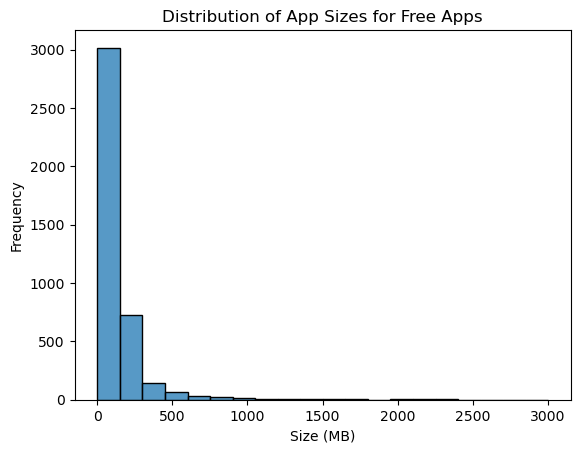

In [27]:
sns.histplot(df[df['price'] == 0]['size_bytes'] / (1024 * 1024), bins=20)
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes for Free Apps')
plt.show()


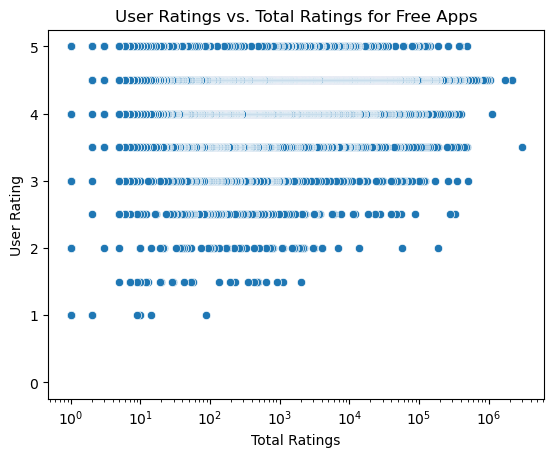

In [29]:
sns.scatterplot(data=df[df['price'] == 0], x='rating_count_tot', y='user_rating')
plt.xlabel('Total Ratings')
plt.ylabel('User Rating')
plt.title('User Ratings vs. Total Ratings for Free Apps')
plt.xscale('log')
plt.show()


In [31]:
free_apps_avg_ratings = df[df['price'] == 0].groupby('prime_genre')['user_rating'].mean().sort_values(ascending=False)
print(free_apps_avg_ratings)


prime_genre
Productivity         3.959677
Music                3.940299
Photo & Video        3.793413
Health & Fitness     3.578947
Shopping             3.533058
Games                3.528578
Business             3.500000
Education            3.484848
Utilities            3.454128
Travel               3.375000
Reference            3.300000
Weather              3.258065
Entertainment        3.148204
Food & Drink         3.034884
Social Networking    2.996503
Sports               2.917722
News                 2.879310
Medical              2.875000
Lifestyle            2.590426
Finance              2.220238
Navigation           2.200000
Catalogs             1.833333
Book                 1.598485
Name: user_rating, dtype: float64


In [33]:
top_genres = df['prime_genre'].value_counts().head(5).index
average_ratings = df[df['prime_genre'].isin(top_genres)].groupby('prime_genre')['user_rating'].mean()
print(average_ratings)


prime_genre
Education        3.376380
Entertainment    3.246729
Games            3.685008
Photo & Video    3.800860
Utilities        3.278226
Name: user_rating, dtype: float64


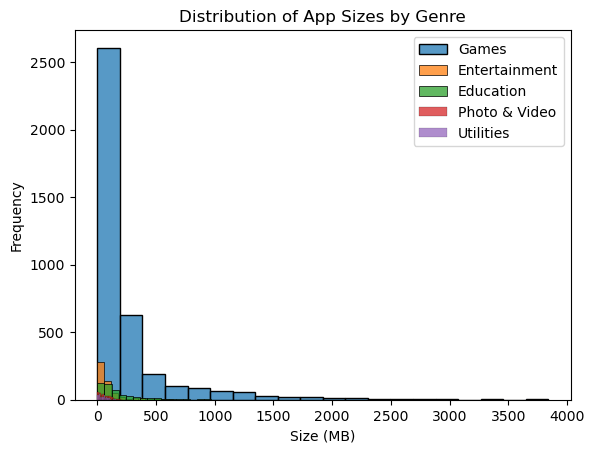

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

for genre in top_genres:
    sns.histplot(df[df['prime_genre'] == genre]['size_bytes'] / (1024 * 1024), bins=20, label=genre)

plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes by Genre')
plt.legend()
plt.show()


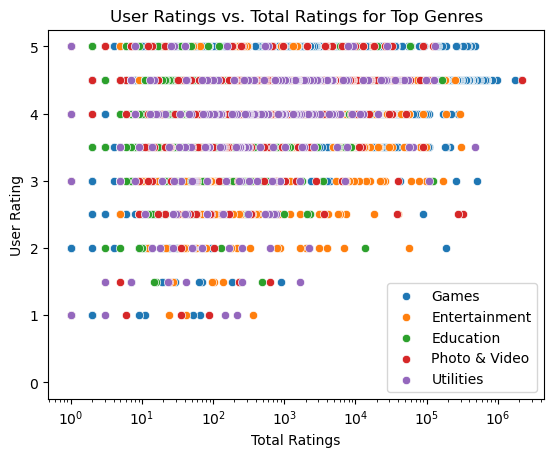

In [37]:
for genre in top_genres:
    sns.scatterplot(data=df[df['prime_genre'] == genre], x='rating_count_tot', y='user_rating', label=genre)

plt.xlabel('Total Ratings')
plt.ylabel('User Rating')
plt.title('User Ratings vs. Total Ratings for Top Genres')
plt.xscale('log')
plt.legend()
plt.show()


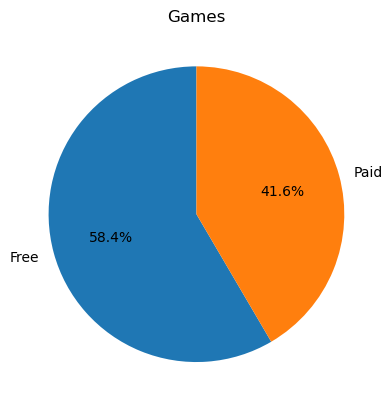

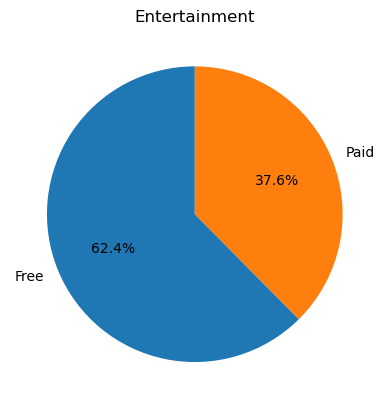

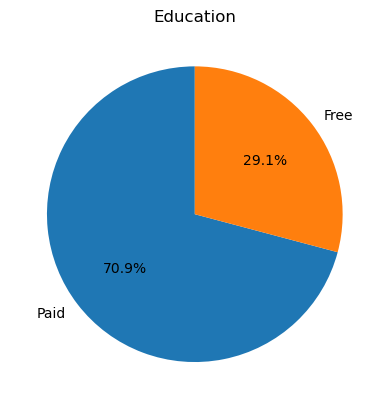

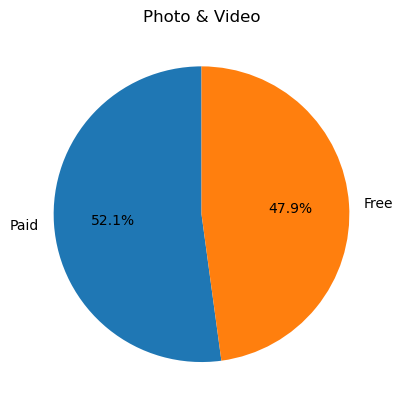

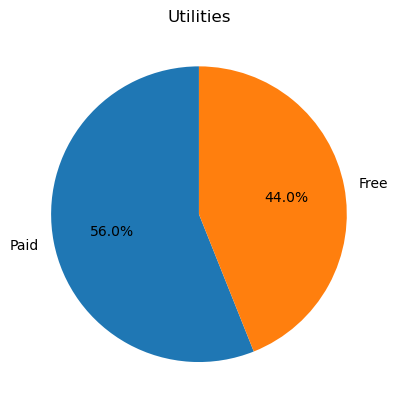

In [39]:
for genre in top_genres:
    free_vs_paid = df[df['prime_genre'] == genre]['price'].apply(lambda x: 'Free' if x == 0 else 'Paid').value_counts()
    free_vs_paid.plot(kind='pie', autopct='%1.1f%%', startangle=90, title=genre)
    plt.ylabel('')
    plt.show()
